# Modeling
#### Contents:
- [Baseline Model](#Baseline-Model)
- [Machine Learning Model: Logistic Regression](#Machine-Learning-Model%3A-Logistic-Regression)
- [Machine Learning Model: Naive Bayes (Multinomial NB)](#Machine-Learning-Model%3A-Naive-Bayes-(Multinomial-NB))
- [Machine Learning Model: Random Forest Classifier](#Machine-Learning-Model%3A-Random-Forest-Classifier)
---

### Importing libaries

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('./datas/train_df.csv')
test_df = pd.read_csv('./datas/test_df.csv')
X_test = pd.read_csv('./datas/X_test.csv', index_col=0)
y_train = pd.read_csv('./datas/y_train.csv', header=None, index_col=0)
y_test = pd.read_csv('./datas/y_test.csv', header=None, index_col=0)
y = pd.read_csv('./datas/y.csv', header=None)

In [3]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

### Baseline Model

**What is this?**
- This is our baseline model. The 1's represent there are 50.0075% of rainbow6 context and 49.9925% of Lol context in our dataset. This is good, because this tells us that our model is very evenly distributed.  Our base goal is to fit our data into several models and get the accuracy score that is higher than 50.0075%. In that case, we will know we are doing better than the baseline.

In [4]:
y[0].value_counts(normalize=True)

1    0.500075
0    0.499925
Name: 0, dtype: float64

## Machine Learning Model: Logistic Regression
---


**Why/why not this model?**
- I've used Grid Search to perform different parameter of C, and in result 3.0 gave the best result. 
- The parameter C is the the inverse of regularization strength in Logistic Regression. 
- The reason why I choose this model as my final, because to be able to interpret if a player is playing lol or rainbow6, our expectation for our model is high accuracy. In this case the Logistic Regression's result gave us an accuracy of **89.148**, which is higher than Random Forest Classifier's accuracy.


In [5]:
params = {'C': [1.0, 2.0, 3.0, 4.0]}

In [6]:
start_time = time.time()
gs_lr = GridSearchCV(LogisticRegression(random_state=42, solver='lbfgs'), 
                  param_grid=params, 
                  return_train_score=False,
                  cv=5)
gs_lr.fit(train_df, y_train.values.ravel())
print(f'Time Spent: {round((time.time()-start_time)/60)} mins')

Time Spent: 1 mins


In [7]:
gs_lr.best_params_

{'C': 3.0}

In [8]:
gs_lr.score(train_df, y_train)

0.9449842812232067

In [9]:
gs_lr.score(test_df, y_test)

0.8914819136522754

In [10]:
X_test[(gs_lr.predict_proba(test_df)[:, 1] < 0.2) & (y_test[1] ==1)].values[:10]

array([['I think of double triple matting a a high risk high reward play It feel like you re a god when it work out for youJackal s Footprint Graph'],
       ['we were gold meta wa mid gold I wa plat I wa M OPLuison ANANA'],
       ['I wonder what he wa thinking lolLife s Mysteries'],
       ['For fighting game it all come down to preferance Take Blitz back to a Armor SpeedThis motherfucker is beyond annoying I feel cheated every time he kill me He need to be slowed down I don t care about the win delta with him he make playing Siege not fun'],
       ['All he did wa make a joke about upvotes he didnt ask for them Players with actual porn in profile portrait So I can t imagine that s allowable What d be the best way to go about reported that Screenshot every single one of them and open a ticket I don t mean the player with suggestive anime portrait artwork hentai'],
       ['Yes from a long time ago Top Anime Plot Twist'],
       ['Doesnt even matter if it a head shotWhat doe lesion me

In [11]:
X_test[(gs_lr.predict_proba(test_df)[:, 1] > 0.4) & (gs_lr.predict_proba(test_df)[:, 1] < 0.6) & (y_test[1] ==1)].values[:10]

array([['Drugs What happened to Vigil getting an esports outfit I m looking everywhere trying to figure out why I haven t heard about Siege not following through with his esports uniform kit Did they decide not to release it or am I missing it somewhere'],
       ['The wiggle zoom in made the video time better Is anyone else experiencing insane ping on XB Me and my friend have played game all with plus ping while the other team is normal Normally I d think this wa some kind if error but it affecting gameplay too'],
       ['Seems so I wonder why tho What have they done to upset this subreddit It s not like I m not watching all of their video and they were never toxic in any of the one I watched They only tk each other iq sound on'],
       ['kill assist and a win get you kTalk about a stress reliever'],
       ['These always look nice but I prefer the more subdued skin that don t make you stand out so much or at least are bright stand offish color like this We had a whole ranked match 

In [13]:
feat_importance = pd.DataFrame(np.exp(gs_lr.best_estimator_.coef_).T, train_df.columns, columns=['importance'])

**What does these words represent?**

It represent how many times the words are less likely to fall into our positive class, which is Rainbow 6. Let's take a closer look of the first Four.

- By looking at the lowest, which is **euw**. This means if the word **euw** appeared in the context like submissions or comments, this context are approximately 0.0055 times more likely(which is less likely) to be our positive class (rainbow six). euw means lagging, which league of legends player likes to say. 

- Secondly, **client**. In the league of legends subreddit, they often discuss client updates a lot. comparing with rainbow six, they don't describe the updates as client update, instead they say path updates. 

- Third, **ult**, ult means ultimate in League of Legends. This is referring to the skills people use the most in the league of legends community. There's no ultimate comparing with Rainbow Six. So this is a good finding.

- Lastly, **iron**. In League of legends, they differentiate the ability of player by divisions of badges. The badge's material demonstrate how good the player are. Iron, Bronze, Silver, Gold, Platinum, Diamond, Master, Grandmaster and Challenger. So, people in the league of legends community like to call other player as iron, meaning they're bad.

Based on the top three, we can confidently conclude that this model works and provided a high accuracy.



(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 , 0.0045]), <a list of 10 Text xticklabel objects>)

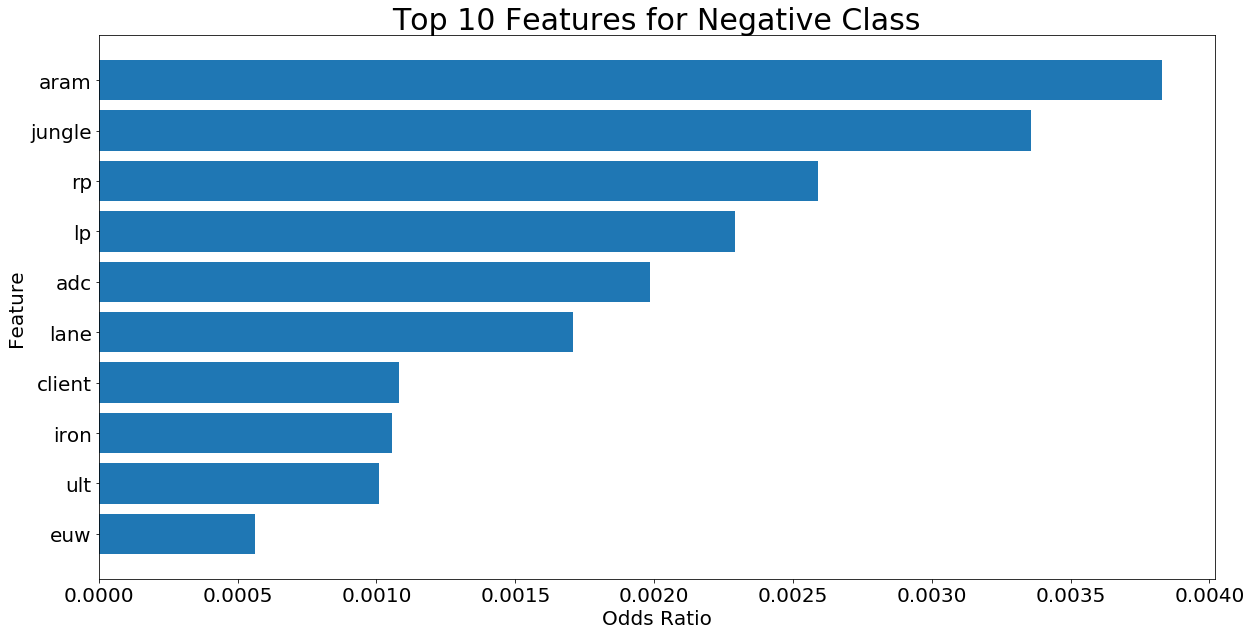

In [14]:
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=True).head(10)
plt.barh(temp.index, temp['importance'])
plt.title('Top 10 Features for Negative Class', fontsize=30)
plt.xlabel('Odds Ratio', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

**What does these words represent?**

It represent how many times the words are more likely to fall into our positive class, which is Rainbow 6. Let's take a closer look of the first three.

- By looking at the highest, which is **casual**. This means if the word **causal** appear in the context like submissions or comments, this context are approximately 125 times more likely to be our positive class (talking about rainbow six). After researching, this is true. Because causal is considered as one of the game mode in Rainbow Six. 

- Secondly, **Console**. Players can play rainbow six either on console or pc, comparing with league of legends. League of legends only offer on PC only. So comparing with our negative class, the word **Console** is approximately 120 times more likely to appear in Rainbow Six instead.

- Third, **Round**. In Rainbow six you'll be assigned into two sides. Attack side or Defense side. So after a **round** is over, they will switch sides. Therefore, the player that used the word **round** in the context will be approximately 80 time more likely to fall to our positive class. Whereas, League of Legends doesn't have rounds. It's either one game or the other. 

Based on the top three, we can confidently conclude that this model works and provided a high accuracy.

 


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

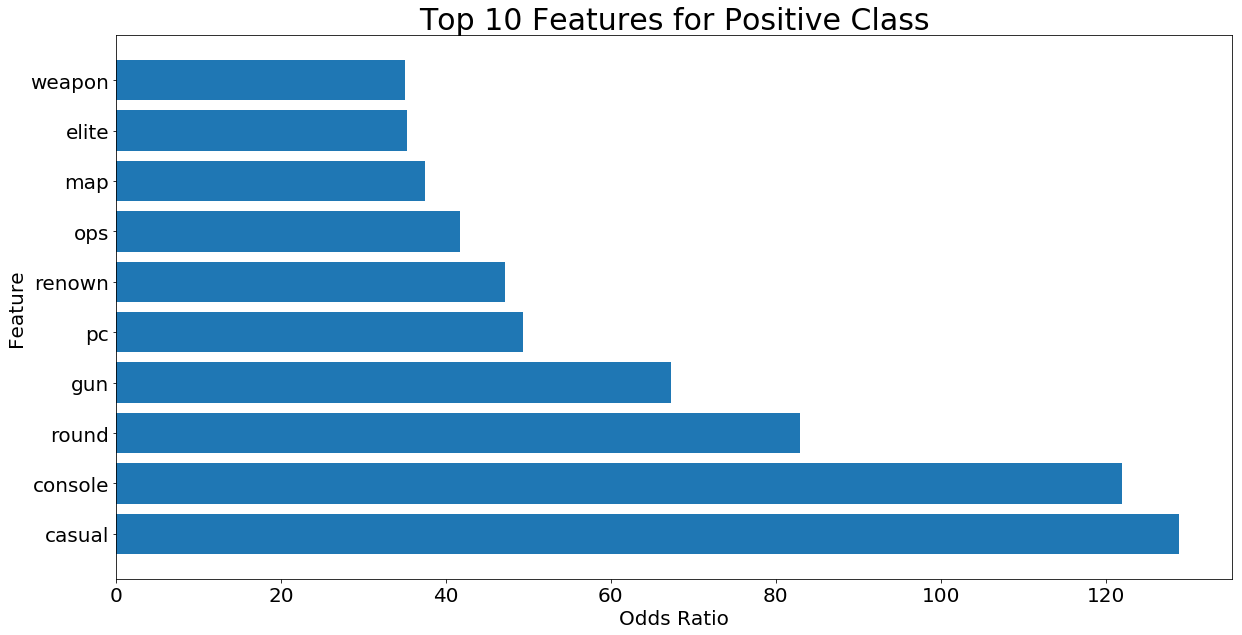

In [36]:
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=False).head(10)
plt.barh(temp.index, temp['importance'])
plt.title('Top 10 Features for Positive Class', fontsize=30)
plt.xlabel('Odds Ratio', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [17]:
predictions_lr = gs_lr.predict(test_df)
tn, fp, fn, tp = confusion_matrix(y_test, predictions_lr).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2644
False Positives: 355
False Negatives: 296
True Positives: 2704


## Machine Learning Model: Random Forest Classifier
---


**Why/why not this model?**
- I've used Grid Search to perform different parameter of Min_sample_split, and max_depth in result it gave the best result. of max_depth of None and min_samples_split of 7
- The reason why I did not choose this model as my final, because to be able to interpret if a player is playing lol or rainbow6, our expectation for our model is high accuracy. In this case the Random Forest Classifier's result gave us an accuracy of **86.764**, which is lower than Logistic Regression's accuracy.


In [38]:
params = {
    'min_samples_split': [2,3,5,7,10],
    'max_depth': [None, 1, 2, 3, 4]
}

In [39]:
start_time = time.time()
gs = GridSearchCV(RandomForestClassifier(n_estimators=100), 
                  param_grid=params, 
                  return_train_score=False,
                  cv=5)
gs.fit(train_df, y_train.values.ravel())
print(f'Time Spent: {round((time.time()-start_time)/60)} mins')

Time Spent: 9 mins


In [40]:
gs.score(train_df, y_train.values.ravel())

0.9972849385538726

In [41]:
gs.score(test_df, y_test)

0.8676446074345724

In [42]:
gs.best_params_

{'max_depth': None, 'min_samples_split': 7}